# Evolutionary Algorithm Analysis

Import the libraries

In [1]:
import os
os.chdir('../../')
import numpy
%matplotlib notebook
import matplotlib.pyplot as plt

Set the parameters

In [2]:
filename = './results/EA_individuals_mfgoc_fanin_2000.csv'
number_of_parameters = 2
number_of_features = 2
parameters_to_plot_2D = [0,1]
selected_individuals = 10
min_parameter_values = numpy.array([1.2e-10,1.0])
max_parameter_values = numpy.array([1.5e-9,2.0])
labels = ['MF-GoC Max Weight (nS)', 'MF-GoC LTD/LTP ratio']

Read the file and load the EA data

In [3]:
data = numpy.loadtxt(filename)
print 'Loaded',data.shape[1],'columns and',data.shape[0],'rows'
parameters = data[:,:number_of_parameters]
output = data[:,number_of_parameters:]
hall_of_fame = numpy.argsort(output[:,0])[-selected_individuals:][::-1]
print 'Hall of fame:'
for pos, best_id in enumerate(hall_of_fame):
    print pos+1,". Parameters:",parameters[best_id,:],"Features:",output[best_id,:]

Loaded 4 columns and 1641 rows
Hall of fame:
1 . Parameters: [4.22497739e-11 1.46238259e+00] Features: [0.67345127 0.01912035]
2 . Parameters: [4.21960395e-11 1.45019764e+00] Features: [0.67230168 0.01984259]
3 . Parameters: [4.24138589e-11 1.46238259e+00] Features: [0.67194443 0.02058369]
4 . Parameters: [4.24138589e-11 1.46266555e+00] Features: [0.67150894 0.02118526]
5 . Parameters: [4.40394850e-11 1.44613542e+00] Features: [0.67129495 0.02127664]
6 . Parameters: [4.24138589e-11 1.47830482e+00] Features: [0.6709458  0.02282244]
7 . Parameters: [4.23624140e-11 1.48113666e+00] Features: [0.67074175 0.0230205 ]
8 . Parameters: [4.34387157e-11 1.46043247e+00] Features: [0.67073436 0.02087205]
9 . Parameters: [4.30968347e-11 1.42239651e+00] Features: [0.67040058 0.02145797]
10 . Parameters: [4.22497739e-11 1.47366653e+00] Features: [0.67029552 0.02341973]


Plot the parameter and output distribution

<IPython.core.display.Javascript object>


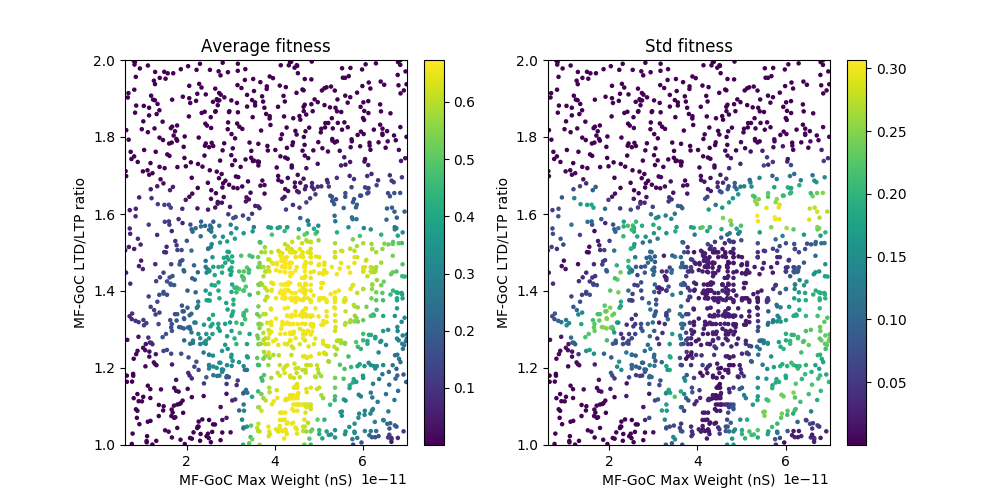

In [4]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(parameters[:,parameters_to_plot_2D[0]],parameters[:,parameters_to_plot_2D[1]],s=5,c=output[:,0])
plt.title('Average fitness')
plt.xlabel(labels[parameters_to_plot_2D[0]])
plt.xlim(min_parameter_values[parameters_to_plot_2D[0]],max_parameter_values[parameters_to_plot_2D[0]])
plt.ylabel(labels[parameters_to_plot_2D[1]])
plt.ylim([min_parameter_values[parameters_to_plot_2D[1]],max_parameter_values[parameters_to_plot_2D[1]]])
plt.colorbar()
plt.show()
plt.subplot(1,2,2)
plt.scatter(parameters[:,parameters_to_plot_2D[0]],parameters[:,parameters_to_plot_2D[1]],s=5,c=output[:,1])
plt.title('Std fitness')
plt.xlabel(labels[parameters_to_plot_2D[0]])
plt.xlim(min_parameter_values[parameters_to_plot_2D[0]],max_parameter_values[parameters_to_plot_2D[0]])
plt.ylabel(labels[parameters_to_plot_2D[1]])
plt.ylim([min_parameter_values[parameters_to_plot_2D[1]],max_parameter_values[parameters_to_plot_2D[1]]])
plt.colorbar()
plt.show()

Plot multiscale scaling of the parameters

<IPython.core.display.Javascript object>


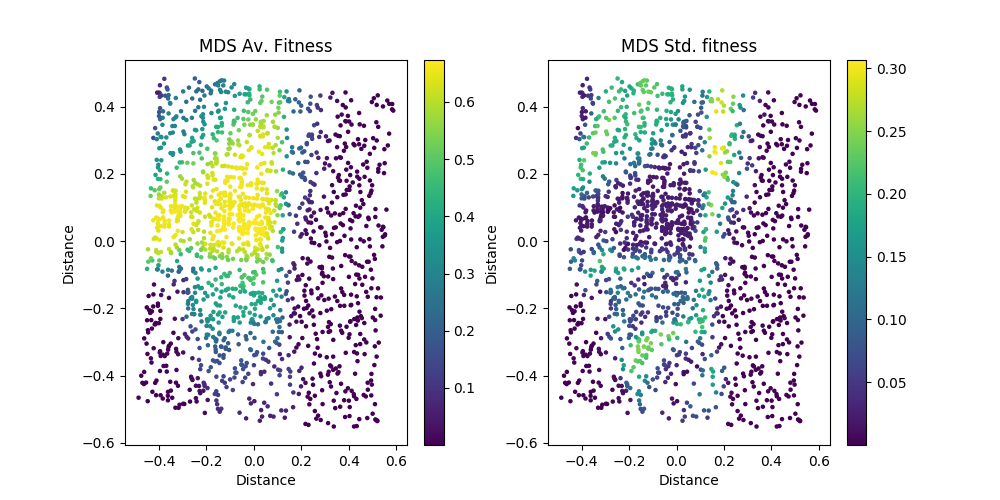

In [5]:
import sklearn.manifold
# Scale the parameters according to the search boundaries
scaled_parameters = (parameters-min_parameter_values)/(max_parameter_values-min_parameter_values)
mds = sklearn.manifold.MDS(number_of_parameters, max_iter=10000, n_init=1)
Y = mds.fit_transform(scaled_parameters)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(Y[:,0],Y[:,1],s=5,c=output[:,0])
plt.title('MDS Av. Fitness')
plt.xlabel('Distance')
plt.ylabel('Distance')
plt.axis('tight')
plt.colorbar()
plt.subplot(1,2,2)
plt.scatter(Y[:,0],Y[:,1],s=5,c=output[:,1])
plt.title('MDS Std. fitness')
plt.xlabel('Distance')
plt.ylabel('Distance')
plt.axis('tight')
plt.colorbar()
plt.show()